In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
df = pd.read_excel("Sample - Superstore.xls")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
for i in df.columns:
    print(i, len(df[i].unique()))

Row ID 9994
Order ID 5009
Order Date 1237
Ship Date 1334
Ship Mode 4
Customer ID 793
Customer Name 793
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Product ID 1862
Category 3
Sub-Category 17
Product Name 1850
Sales 6144
Quantity 14
Discount 12
Profit 7545


In [4]:
erasable = ["Row ID", "Order ID", "Customer ID", "Customer Name", "Product Name" , "Country", "Profit"]

In [37]:
for i in df.columns:
    print(i, df[i].isnull().sum())

Order Date 0
Ship Date 0
Ship Mode 0
Segment 0
State 0
Postal Code 0
Region 0
Product ID 0
Category 0
Sales 0
Quantity 0
Discount 0
year 0
Sales per One 0


In [5]:
for i in erasable:
    del df[i]
df

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount
0,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00
1,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00
2,2016-06-12,2016-06-16,Second Class,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00
3,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45
4,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,25.2480,3,0.20
9990,2017-02-26,2017-03-03,Standard Class,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,91.9600,2,0.00
9991,2017-02-26,2017-03-03,Standard Class,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,258.5760,2,0.20
9992,2017-02-26,2017-03-03,Standard Class,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,29.6000,4,0.00


In [6]:
def encode(series):
    dic = dict(zip(series.unique(), range(len(series.unique()))))
    result = series.apply(lambda x : dic[x])
    return result

In [7]:
# Postal Code와 City의 상관관계가 너무 높음
a = pd.DataFrame(encode(df["Region"]))
b = pd.DataFrame(encode(df["Postal Code"]))
c = pd.DataFrame(encode(df["State"]))
d = pd.DataFrame(encode(df["City"]))

ddf = pd.concat([a,b,c,d], axis = 1)
ddf.corr()

,Region,Postal Code,State,City
Region,1.000000,-0.081893,0.305553,-0.128121
Postal Code,-0.081893,1.000000,0.301011,0.909910
State,0.305553,0.301011,1.000000,0.266662
City,-0.128121,0.909910,0.266662,1.000000


In [8]:
del df["City"]

In [9]:
a = pd.DataFrame(encode(df["Category"]))
b = pd.DataFrame(encode(df["Sub-Category"]))
c = pd.DataFrame(encode(df["Product ID"]))
d = pd.DataFrame(df["Sales"])

ddf = pd.concat([a,b,c,d], axis = 1)
ddf.corr()

,Category,Sub-Category,Product ID,Sales
Category,1.000000,0.593670,0.039832,0.040077
Sub-Category,0.593670,1.000000,0.074581,-0.012384
Product ID,0.039832,0.074581,1.000000,0.015431
Sales,0.040077,-0.012384,0.015431,1.000000


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [11]:
df["Region"] = pd.DataFrame(encode(df["Region"]))
df["Postal Code"] = pd.DataFrame(encode(df["Postal Code"]))
df["State"] = pd.DataFrame(encode(df["State"]))

df["Category"] = pd.DataFrame(encode(df["Category"]))
df["Sub-Category"] = pd.DataFrame(encode(df["Sub-Category"]))
df["Product ID"] = pd.DataFrame(encode(df["Product ID"]))

df["Segment"] = pd.DataFrame(encode(df["Segment"]))

df["Ship Mode"] = pd.DataFrame(encode(df["Ship Mode"]))

df

,Order Date,Ship Date,Ship Mode,Segment,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount
0,2016-11-08,2016-11-11,0,0,0,0,0,0,0,0,261.9600,2,0.00
1,2016-11-08,2016-11-11,0,0,0,0,0,1,0,1,731.9400,3,0.00
2,2016-06-12,2016-06-16,0,1,1,1,1,2,1,2,14.6200,2,0.00
3,2015-10-11,2015-10-18,1,0,2,2,0,3,0,3,957.5775,5,0.45
4,2015-10-11,2015-10-18,1,0,2,2,0,4,1,4,22.3680,2,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,0,0,2,123,0,1172,0,5,25.2480,3,0.20
9990,2017-02-26,2017-03-03,1,0,1,146,1,1762,0,5,91.9600,2,0.00
9991,2017-02-26,2017-03-03,1,0,1,146,1,297,2,7,258.5760,2,0.20
9992,2017-02-26,2017-03-03,1,0,1,146,1,956,1,10,29.6000,4,0.00


In [12]:
df.corrwith(df["Sales"]).sort_values(ascending = False)

Sales           1.000000
Quantity        0.200795
Category        0.040077
Product ID      0.015431
Segment         0.010866
State           0.008136
Region         -0.000572
Ship Mode      -0.001524
Sub-Category   -0.012384
Postal Code    -0.016143
Discount       -0.028190
dtype: float64

In [13]:
df = df.sort_values(by = "Order Date").reset_index(drop = True)

In [14]:
df["year"] = df["Order Date"].apply(lambda x : int(str(x)[:4]))
df

,Order Date,Ship Date,Ship Mode,Segment,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,year
0,2014-01-03,2014-01-07,1,0,5,14,2,1536,1,10,16.448,2,0.2,2014
1,2014-01-04,2014-01-08,1,2,10,17,2,607,1,2,11.784,3,0.2,2014
2,2014-01-04,2014-01-08,1,2,10,17,2,418,1,4,272.736,3,0.2,2014
3,2014-01-04,2014-01-08,1,2,10,17,2,608,1,8,3.540,2,0.8,2014
4,2014-01-05,2014-01-12,1,0,9,105,3,359,1,6,19.536,3,0.2,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2017-12-30,2018-01-03,1,0,22,521,1,242,1,13,3.024,3,0.2,2017
9990,2017-12-30,2018-01-03,1,0,15,29,3,715,1,8,52.776,3,0.2,2017
9991,2017-12-30,2018-01-03,1,0,15,29,3,714,2,7,90.930,7,0.0,2017
9992,2017-12-30,2018-01-03,1,1,1,260,1,530,1,8,13.904,2,0.2,2017


In [15]:
df["Sales per One"] = df["Sales"]/df["Quantity"]
df.corrwith(df["Sales per One"]).sort_values(ascending = False)

Sales per One    1.000000
Sales            0.889376
Category         0.051548
Product ID       0.021078
State            0.013799
Segment          0.011658
Ship Mode        0.009523
Region           0.004763
year            -0.002936
Quantity        -0.003148
Sub-Category    -0.009289
Postal Code     -0.012813
Discount        -0.032803
dtype: float64

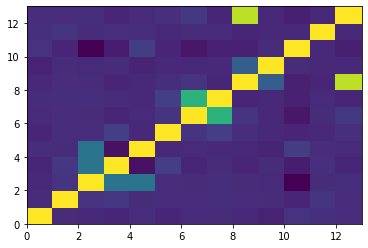

In [16]:
plt.pcolor(df.corr())

In [17]:
df.corr()

,Ship Mode,Segment,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,year,Sales per One
Ship Mode,1.000000,0.007101,-0.000644,-0.009374,0.013634,-0.010539,0.002465,0.005649,-0.001524,-0.022998,0.027470,0.024562,0.009523
Segment,0.007101,1.000000,0.037701,0.044781,0.004960,0.012500,0.010123,0.014145,0.010866,0.008130,-0.016679,0.040803,0.011658
State,-0.000644,0.037701,1.000000,0.301011,0.305553,0.011865,0.008153,0.014418,0.008136,0.002144,-0.132230,0.005839,0.013799
Postal Code,-0.009374,0.044781,0.301011,1.000000,-0.081893,0.075415,-0.008442,0.007419,-0.016143,0.007953,-0.042062,0.019795,-0.012813
Region,0.013634,0.004960,0.305553,-0.081893,1.000000,-0.005974,0.003213,-0.004309,-0.000572,-0.018765,0.067762,0.012886,0.004763
Product ID,-0.010539,0.012500,0.011865,0.075415,-0.005974,1.000000,0.039832,0.074581,0.015431,-0.006071,-0.013781,0.000317,0.021078
Category,0.002465,0.010123,0.008153,-0.008442,0.003213,0.039832,1.000000,0.593670,0.040077,-0.003619,-0.062897,0.005219,0.051548
Sub-Category,0.005649,0.014145,0.014418,0.007419,-0.004309,0.074581,0.593670,1.000000,-0.012384,-0.003298,-0.027811,0.002217,-0.009289
Sales,-0.001524,0.010866,0.008136,-0.016143,-0.000572,0.015431,0.040077,-0.012384,1.000000,0.200795,-0.028190,-0.009679,0.889376
Quantity,-0.022998,0.008130,0.002144,0.007953,-0.018765,-0.006071,-0.003619,-0.003298,0.200795,1.000000,0.008623,-0.005810,-0.003148


In [18]:
del df["Sub-Category"]

In [19]:
df

,Order Date,Ship Date,Ship Mode,Segment,State,Postal Code,Region,Product ID,Category,Sales,Quantity,Discount,year,Sales per One
0,2014-01-03,2014-01-07,1,0,5,14,2,1536,1,16.448,2,0.2,2014,8.224
1,2014-01-04,2014-01-08,1,2,10,17,2,607,1,11.784,3,0.2,2014,3.928
2,2014-01-04,2014-01-08,1,2,10,17,2,418,1,272.736,3,0.2,2014,90.912
3,2014-01-04,2014-01-08,1,2,10,17,2,608,1,3.540,2,0.8,2014,1.770
4,2014-01-05,2014-01-12,1,0,9,105,3,359,1,19.536,3,0.2,2014,6.512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2017-12-30,2018-01-03,1,0,22,521,1,242,1,3.024,3,0.2,2017,1.008
9990,2017-12-30,2018-01-03,1,0,15,29,3,715,1,52.776,3,0.2,2017,17.592
9991,2017-12-30,2018-01-03,1,0,15,29,3,714,2,90.930,7,0.0,2017,12.990
9992,2017-12-30,2018-01-03,1,1,1,260,1,530,1,13.904,2,0.2,2017,6.952


In [21]:
df.corrwith(df["Sales per One"]).sort_values(ascending = False)

Sales per One    1.000000
Sales            0.889376
Category         0.051548
Product ID       0.021078
State            0.013799
Segment          0.011658
Ship Mode        0.009523
Region           0.004763
year            -0.002936
Quantity        -0.003148
Postal Code     -0.012813
Discount        -0.032803
dtype: float64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df[["Category", "Product ID", "Postal Code"]], df["Sales per One"])
model = RandomForestRegressor()
model.fit(X_train,  y_train)

model.score(X_test, y_test)

0.5950458948122821

In [34]:
for i in tqdm(range(100, 1000, 200)):
    model = RandomForestRegressor(n_estimators= i, max_depth = 70)
    #model = RandomForestRegressor(n_estimators= i, max_depth = 70, max_leaf_nodes = w)
    model.fit(X_train,  y_train)
    print("n_estimators= {}".format(i, w))
    print(model.score(X_test, y_test))
    print(" ")

 20%|██        | 1/5 [00:00<00:03,  1.07it/s]

n_estimators= 100
0.5513580893270822
 


 40%|████      | 2/5 [00:03<00:05,  1.97s/it]

n_estimators= 300
0.5553137862032604
 


 60%|██████    | 3/5 [00:08<00:06,  3.08s/it]

n_estimators= 500
0.5601535222840476
 
n_estimators= 700


 80%|████████  | 4/5 [00:14<00:04,  4.27s/it]

0.5567240161176479
 
n_estimators= 900


100%|██████████| 5/5 [00:22<00:00,  4.41s/it]

0.5609214362098578
 


In [41]:
df = pd.read_excel("Pistachio_28_Features_Dataset.xlsx")
df

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,...,20.8474,20.8118,21.1175,-0.6994,-0.7071,-0.6963,2.8853,2.6599,2.6317,Siirt_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,...,21.2621,22.5004,21.5821,-0.5567,-0.4968,-0.6597,2.3022,2.2664,2.5161,Siirt_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,...,21.1262,20.0279,17.4401,-0.9072,-0.8790,-0.4470,3.3112,3.4306,3.0697,Siirt_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,...,19.3274,19.1782,19.8930,-0.9473,-0.8404,-0.3153,3.4237,2.9606,3.0033,Siirt_Pistachio


In [48]:
df=df[['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', "Class"]]

In [49]:
df

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,Siirt_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,Siirt_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,Siirt_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,Siirt_Pistachio


In [52]:
df["Class"] = encode(df["Class"])
df

C:\Users\USER2\AppData\Local\Temp\ipykernel_2868\69342948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"] = encode(df["Class"])


,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,1
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,1
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,1
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,1


In [54]:
df.corrwith(df["Class"]).sort_values(ascending = False)

Class           1.000000
Minor_Axis      0.668126
Compactness     0.624939
Area            0.589226
Convex_Area     0.584618
Eqdiasq         0.577300
Perimeter       0.145290
Major_Axis      0.136845
Solidity        0.125347
Roundness       0.105768
Extent          0.100200
Eccentricity   -0.546759
Aspect_Ratio   -0.581469
dtype: float64

In [55]:
df.corr()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Class
Area,1.000000,0.115941,0.697782,0.795881,-0.358892,0.997399,0.363959,0.943877,0.331784,-0.424025,0.250423,0.551711,0.589226
Perimeter,0.115941,1.000000,0.094296,0.390740,-0.334483,0.113631,-0.671046,0.364474,-0.403916,-0.312373,-0.891777,0.044624,0.145290
Major_Axis,0.697782,0.094296,1.000000,0.272578,0.298836,0.705333,0.247822,0.661892,0.186830,0.265049,0.153592,-0.201121,0.136845
Minor_Axis,0.795881,0.390740,0.272578,1.000000,-0.816731,0.793155,-0.085556,0.890003,0.047442,-0.839078,-0.066594,0.773512,0.668126
Eccentricity,-0.358892,-0.334483,0.298836,-0.816731,1.000000,-0.352723,0.257060,-0.482713,0.080967,0.943751,0.171669,-0.846851,-0.546759
Eqdiasq,0.997399,0.113631,0.705333,0.793155,-0.352723,1.000000,0.372779,0.940651,0.340073,-0.423318,0.254242,0.549971,0.577300
Solidity,0.363959,-0.671046,0.247822,-0.085556,0.257060,0.372779,1.000000,0.042000,0.678599,0.177830,0.779134,0.226165,0.125347
Convex_Area,0.943877,0.364474,0.661892,0.890003,-0.482713,0.940651,0.042000,1.000000,0.122881,-0.522637,-0.007125,0.515907,0.584618
Extent,0.331784,-0.403916,0.186830,0.047442,0.080967,0.340073,0.678599,0.122881,1.000000,0.023303,0.512278,0.254064,0.100200
Aspect_Ratio,-0.424025,-0.312373,0.265049,-0.839078,0.943751,-0.423318,0.177830,-0.522637,0.023303,1.000000,0.115896,-0.896857,-0.581469


In [62]:
import seaborn as sns

<AxesSubplot:>

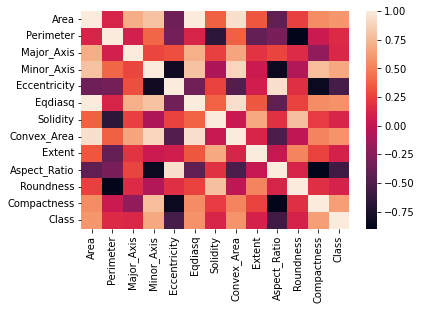

In [63]:
sns.heatmap(df.corr())

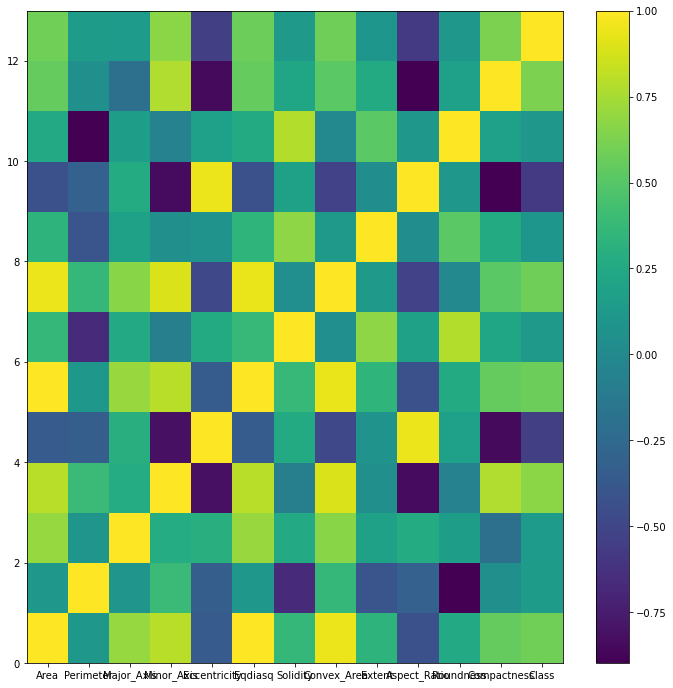

In [61]:
plt.figure(figsize = (12,12))
plt.pcolor(df.corr())
plt.xticks(np.arange(0.5, len(df.corr().columns), 1), df.corr().columns)
plt.xticks(np.arange(0.5, len(df.corr().index), 1), df.corr().index)
plt.colorbar()
plt.show()

In [73]:
df=df[['Minor_Axis', 'Solidity', 'Extent',
       'Roundness', 'Compactness', "Class"]]
df

,Minor_Axis,Solidity,Extent,Roundness,Compactness,Class
0,236.7461,0.8665,0.6394,0.3238,0.7278,0
1,234.7525,0.8765,0.6772,0.2277,0.7181,0
2,220.5547,0.9172,0.7127,0.5951,0.6767,0
3,216.0765,0.9589,0.7028,0.4278,0.7005,0
4,220.9344,0.9657,0.7459,0.6425,0.6803,0
...,...,...,...,...,...,...
2143,248.8627,0.9823,0.6799,0.8070,0.7446,1
2144,278.9297,0.8886,0.6590,0.1988,0.7509,1
2145,271.3299,0.9888,0.7584,0.8061,0.7551,1
2146,274.5764,0.9902,0.7635,0.8569,0.7788,1


<AxesSubplot:>

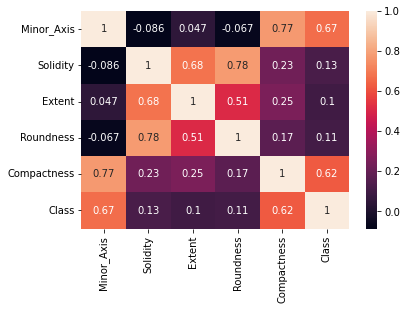

In [74]:
sns.heatmap(df.corr(), annot = True)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import r2_score

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df[['Minor_Axis', 'Solidity', 'Extent', 'Roundness', 'Compactness']], df["Class"])

model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier()
model5 = GradientBoostingClassifier()
model6 = xgb.XGBClassifier()
model7 = LGBMClassifier()

model1.fit(X_train,  y_train)
model2.fit(X_train,  y_train)
model3.fit(X_train,  y_train)
model4.fit(X_train,  y_train)
model5.fit(X_train,  y_train)
model6.fit(X_train,  y_train)
model7.fit(X_train,  y_train)

LGBMClassifier()

In [106]:
predict1 = model1.predict(X_train)
predict2 = model2.predict(X_train)
predict3 = model3.predict(X_train)
predict4 = model4.predict(X_train)
predict5 = model5.predict(X_train)
predict6 = model6.predict(X_train)
predict7 = model7.predict(X_train)

In [107]:
predict_avg = np.round((predict1 + predict2 + predict3 + predict4 + predict5 + predict6 + predict7)/7)

In [104]:
y_train

1151    0
409     0
559     0
362     0
589     0
       ..
531     0
1433    1
1059    0
599     0
1946    1
Name: Class, Length: 1611, dtype: int64

In [108]:
score = 0
for a, i in enumerate(predict_avg):
    if y_train.reset_index(drop = True)[a] == i:
        score += 1
    else:
        pass
score/len(y_train)

1.0

<BarContainer object of 8 artists>

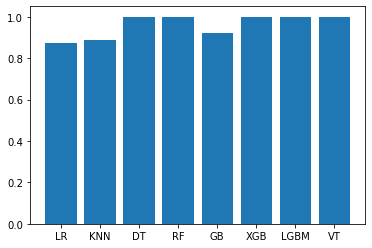

In [109]:
model_name = ["LR", "KNN", "DT", "RF", "GB", "XGB", "LGBM", "VT"]
scores = [model1.score(X_train, y_train), model2.score(X_train, y_train),
          model3.score(X_train, y_train), model4.score(X_train, y_train),
          model5.score(X_train, y_train), model6.score(X_train, y_train),
          model7.score(X_train, y_train), score/len(y_train)]

plt.bar(model_name, scores)

In [112]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)
predict4 = model4.predict(X_test)
predict5 = model5.predict(X_test)
predict6 = model6.predict(X_test)
predict7 = model7.predict(X_test)
predict_avg = np.round((predict1 + predict2 + predict3 + predict4 + predict5 + predict6 + predict7)/7)

In [114]:
score = 0
for a, i in enumerate(predict_avg):
    if y_test.reset_index(drop = True)[a] == i:
        score += 1
    else:
        pass
score/len(y_test)

0.8566108007448789

<BarContainer object of 8 artists>

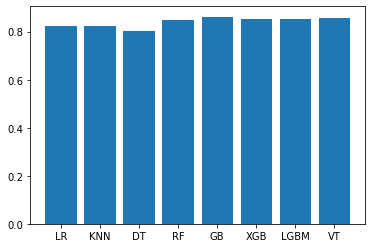

In [116]:
model_name = ["LR", "KNN", "DT", "RF", "GB", "XGB", "LGBM", "VT"]
scores2 = [model1.score(X_test, y_test), model2.score(X_test, y_test),
           model3.score(X_test, y_test), model4.score(X_test, y_test),
           model5.score(X_test, y_test), model6.score(X_test, y_test),
           model7.score(X_test, y_test), score/len(y_test)]

plt.bar(model_name, scores2)

<BarContainer object of 8 artists>

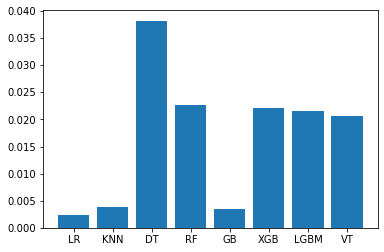

In [117]:
gap = []
for a, i in enumerate(scores):
    gap.append((i - scores2[a])**2)
plt.bar(model_name, gap)